In [5]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

df = pd.read_excel("last_zno_without_ner.xlsx", index=False)
df.tail()

,text,class
19307,"Добрый день в SAP УВХД, необходимо предоставит...",6-1
19308,Добрый день! Ранее направлялся запрос № SD0075...,1-71
19309,Нет возможности предоставить роли сотруднику #...,111
19310,Добрый день! При закрытии исполненного договор...,1-72
19311,"При исполнении ЗНР07210183 , ЗНР07210184, ЗНР0...",111


In [2]:
#У нас есть текст проблемы и её класс
df['text'][4]

'При попытке подписания документа внутри банка появляется ошибка (скрин во вложении) '

In [4]:
df['text'][-10:]

19302    Добрый день! Вопрос очень срочный. Не получает...
19303    Вопрос/проблема: Здравствуйте! При закрытии до...
19304    Добрый день, подскажите, какая должна быть рол...
19305    Вопрос/информация: необходима помощь при согла...
19306    Вопрос/проблема: ЗНИ 60001323184 ушла на согла...
19307    Добрый день в SAP УВХД, необходимо предоставит...
19308    Добрый день! Ранее направлялся запрос № SD0075...
19309    Нет возможности предоставить роли сотруднику #...
19310    Добрый день! При закрытии исполненного договор...
19311    При исполнении ЗНР07210183 , ЗНР07210184, ЗНР0...
Name: text, dtype: object

In [3]:
#Токенизация

In [4]:
import re

deleted_symols = '[\\\\\'[\]!"$%&()*+,-./:;<=>?@^_`{|}~«»\n]'
func = lambda text : re.sub(deleted_symols, ' ', text)
df["without_punctuation_text"] = df["text"].apply(func)

In [5]:
df.head()

,text,class,without_punctuation_text
0,"После оплаты , выполнения ЗнЗ, не получается и...",1-1,После оплаты выполнения ЗнЗ не получается и...
1,Вопрос/проблема: Не дает исполнить ЗНС,1-1,Вопрос проблема Не дает исполнить ЗНС
2,Вопрос/проблема: Не могу исполнить знз 2076251...,1-22,Вопрос проблема Не могу исполнить знз 2076251...
3,Вопрос/проблема: Дорбрый день! Пытаюсь провест...,1-71,Вопрос проблема Дорбрый день Пытаюсь провест...
4,При попытке подписания документа внутри банка ...,1-71,При попытке подписания документа внутри банка ...


In [6]:
deleted_symols = '0123456789'

func = lambda text : (' '.join([re.sub(deleted_symols, ' ', x) for x in text.split() if not x.isdigit()]))
df['without_numbers_text'] = df['without_punctuation_text'].apply(func)

In [7]:
df['without_numbers_text'].head()

0    После оплаты выполнения ЗнЗ не получается испо...
1                Вопрос проблема Не дает исполнить ЗНС
2    Вопрос проблема Не могу исполнить знз по догов...
3    Вопрос проблема Дорбрый день Пытаюсь провести ...
4    При попытке подписания документа внутри банка ...
Name: without_numbers_text, dtype: object

In [8]:
df["tokenized_text"] = df['without_numbers_text']
df = df.drop(["without_numbers_text", "without_punctuation_text"], axis=1)

In [9]:
df.head()

,text,class,tokenized_text
0,"После оплаты , выполнения ЗнЗ, не получается и...",1-1,После оплаты выполнения ЗнЗ не получается испо...
1,Вопрос/проблема: Не дает исполнить ЗНС,1-1,Вопрос проблема Не дает исполнить ЗНС
2,Вопрос/проблема: Не могу исполнить знз 2076251...,1-22,Вопрос проблема Не могу исполнить знз по догов...
3,Вопрос/проблема: Дорбрый день! Пытаюсь провест...,1-71,Вопрос проблема Дорбрый день Пытаюсь провести ...
4,При попытке подписания документа внутри банка ...,1-71,При попытке подписания документа внутри банка ...


In [10]:
# Предобработка данных

In [11]:
n_words = len(set(" ".join(df["tokenized_text"]).split()))
n_words

34222

In [12]:
df["lowercase_text"] = df["tokenized_text"].apply(lambda text : text.lower())

In [13]:
df.head()

,text,class,tokenized_text,lowercase_text
0,"После оплаты , выполнения ЗнЗ, не получается и...",1-1,После оплаты выполнения ЗнЗ не получается испо...,после оплаты выполнения знз не получается испо...
1,Вопрос/проблема: Не дает исполнить ЗНС,1-1,Вопрос проблема Не дает исполнить ЗНС,вопрос проблема не дает исполнить знс
2,Вопрос/проблема: Не могу исполнить знз 2076251...,1-22,Вопрос проблема Не могу исполнить знз по догов...,вопрос проблема не могу исполнить знз по догов...
3,Вопрос/проблема: Дорбрый день! Пытаюсь провест...,1-71,Вопрос проблема Дорбрый день Пытаюсь провести ...,вопрос проблема дорбрый день пытаюсь провести ...
4,При попытке подписания документа внутри банка ...,1-71,При попытке подписания документа внутри банка ...,при попытке подписания документа внутри банка ...


In [14]:
import pymorphy2
from pymorphy2 import MorphAnalyzer

def to_lemmatize1(df):
    lemmatizer = MorphAnalyzer()
    lemm_func = lambda text: ' '.join([lemmatizer.normal_forms(word)[0] for word in text.split()])
    df['lemmatized_text'] = df['lowercase_text'].apply(lemm_func)
    
    return df

In [15]:
%%time
df = to_lemmatize1(df)

Wall time: 1min 39s


In [16]:
df.head()

,text,class,tokenized_text,lowercase_text,lemmatized_text
0,"После оплаты , выполнения ЗнЗ, не получается и...",1-1,После оплаты выполнения ЗнЗ не получается испо...,после оплаты выполнения знз не получается испо...,после оплата выполнение знз не получаться испо...
1,Вопрос/проблема: Не дает исполнить ЗНС,1-1,Вопрос проблема Не дает исполнить ЗНС,вопрос проблема не дает исполнить знс,вопрос проблема не давать исполнить знс
2,Вопрос/проблема: Не могу исполнить знз 2076251...,1-22,Вопрос проблема Не могу исполнить знз по догов...,вопрос проблема не могу исполнить знз по догов...,вопрос проблема не мочь исполнить знз по догов...
3,Вопрос/проблема: Дорбрый день! Пытаюсь провест...,1-71,Вопрос проблема Дорбрый день Пытаюсь провести ...,вопрос проблема дорбрый день пытаюсь провести ...,вопрос проблема дорбрый день пытаться провести...
4,При попытке подписания документа внутри банка ...,1-71,При попытке подписания документа внутри банка ...,при попытке подписания документа внутри банка ...,при попытка подписание документ внутри банка п...


In [17]:
#осуществление замен полных названий на абрровиатуры

In [19]:
abbr_df = pd.read_csv('abbr_df.csv', dtype=str)
abbr_df.head()

,source,target
0,запрос на снабжение,знс
1,запрос на выбытие,знв
2,заявка на корректировка,знк
3,запрос на расходование средство,знрс
4,заявка на платёж,знп


In [20]:
abbr_df = pd.read_csv('abbr_df.csv', dtype=str)

def abbr_func(text, source, target):
    text = text.replace(source, target)
    return text
    
    
def to_abbr_replace(df):
    df["text_with_abbreviation"] = df["lemmatized_text"]
    for i in range(len(abbr_df)):
        source = abbr_df["source"][i]
        target = abbr_df["target"][i]
        df["text_with_abbreviation"] = abbr_func(df["text_with_abbreviation"],source,target)
    return df
        
df = to_abbr_replace(df)

In [21]:
df.head()

,text,class,tokenized_text,lowercase_text,lemmatized_text,text_with_abbreviation
0,"После оплаты , выполнения ЗнЗ, не получается и...",1-1,После оплаты выполнения ЗнЗ не получается испо...,после оплаты выполнения знз не получается испо...,после оплата выполнение знз не получаться испо...,после оплата выполнение знз не получаться испо...
1,Вопрос/проблема: Не дает исполнить ЗНС,1-1,Вопрос проблема Не дает исполнить ЗНС,вопрос проблема не дает исполнить знс,вопрос проблема не давать исполнить знс,вопрос проблема не давать исполнить знс
2,Вопрос/проблема: Не могу исполнить знз 2076251...,1-22,Вопрос проблема Не могу исполнить знз по догов...,вопрос проблема не могу исполнить знз по догов...,вопрос проблема не мочь исполнить знз по догов...,вопрос проблема не мочь исполнить знз по догов...
3,Вопрос/проблема: Дорбрый день! Пытаюсь провест...,1-71,Вопрос проблема Дорбрый день Пытаюсь провести ...,вопрос проблема дорбрый день пытаюсь провести ...,вопрос проблема дорбрый день пытаться провести...,вопрос проблема дорбрый день пытаться провести...
4,При попытке подписания документа внутри банка ...,1-71,При попытке подписания документа внутри банка ...,при попытке подписания документа внутри банка ...,при попытка подписание документ внутри банка п...,при попытка подписание документ внутри банка п...


In [22]:
#Проверка работы

In [23]:
check_df = DataFrame({"lemmatized_text" : [" запрос на снабжение ", 
                                          " запрос на выбытие ", 
                                          " запрос на расходование средство "]})
abr_check_df = to_abbr_replace(check_df)
union_res = " ".join(abr_check_df["text_with_abbreviation"]).strip()

print(union_res)

знс   знв   знрс


In [24]:
df.head()

,text,class,tokenized_text,lowercase_text,lemmatized_text,text_with_abbreviation
0,"После оплаты , выполнения ЗнЗ, не получается и...",1-1,После оплаты выполнения ЗнЗ не получается испо...,после оплаты выполнения знз не получается испо...,после оплата выполнение знз не получаться испо...,после оплата выполнение знз не получаться испо...
1,Вопрос/проблема: Не дает исполнить ЗНС,1-1,Вопрос проблема Не дает исполнить ЗНС,вопрос проблема не дает исполнить знс,вопрос проблема не давать исполнить знс,вопрос проблема не давать исполнить знс
2,Вопрос/проблема: Не могу исполнить знз 2076251...,1-22,Вопрос проблема Не могу исполнить знз по догов...,вопрос проблема не могу исполнить знз по догов...,вопрос проблема не мочь исполнить знз по догов...,вопрос проблема не мочь исполнить знз по догов...
3,Вопрос/проблема: Дорбрый день! Пытаюсь провест...,1-71,Вопрос проблема Дорбрый день Пытаюсь провести ...,вопрос проблема дорбрый день пытаюсь провести ...,вопрос проблема дорбрый день пытаться провести...,вопрос проблема дорбрый день пытаться провести...
4,При попытке подписания документа внутри банка ...,1-71,При попытке подписания документа внутри банка ...,при попытке подписания документа внутри банка ...,при попытка подписание документ внутри банка п...,при попытка подписание документ внутри банка п...


In [25]:
df["transformed_text"] = df["text_with_abbreviation"]

In [26]:
df = df.drop(["tokenized_text", "lowercase_text", "lemmatized_text", "text_with_abbreviation"], axis=1)
df.head()

,text,class,transformed_text
0,"После оплаты , выполнения ЗнЗ, не получается и...",1-1,после оплата выполнение знз не получаться испо...
1,Вопрос/проблема: Не дает исполнить ЗНС,1-1,вопрос проблема не давать исполнить знс
2,Вопрос/проблема: Не могу исполнить знз 2076251...,1-22,вопрос проблема не мочь исполнить знз по догов...
3,Вопрос/проблема: Дорбрый день! Пытаюсь провест...,1-71,вопрос проблема дорбрый день пытаться провести...
4,При попытке подписания документа внутри банка ...,1-71,при попытка подписание документ внутри банка п...


In [27]:
new_n_words = len(set(" ".join(df["transformed_text"]).split()))
print("количество уникальных слов до обработки обращений:", n_words)
print("количество уникальных слов после обработки обращений:", new_n_words)

количество уникальных слов до обработки обращений: 34222
количество уникальных слов после обработки обращений: 17516


In [27]:
# Первый этап (Отбор частотных слов + Векторизация)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
MAX_N_GRAMM = 5

vectorizer = CountVectorizer(min_df=30, ngram_range=(1, MAX_N_GRAMM))
X = vectorizer.fit_transform(df["transformed_text"])
y = df["class"].values
print("размерность матрицы объекты-признаки:", X.shape)

размерность матрицы объекты-признаки: (19312, 4273)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(X, y, stratify=y, test_size=0.2)
print("===== полученные размерности =====")
print("X_train.shape:", X_train.shape)
print("X_dev.shape:", X_dev.shape)
print("y_train.shape:", y_train.shape)
print("y_dev.shape:", y_dev.shape)

===== полученные размерности =====
X_train.shape: (15449, 4273)
X_dev.shape: (3863, 4273)
y_train.shape: (15449,)
y_dev.shape: (3863,)


In [30]:
y_dev

array(['5-26', '5-26', '1-1', ..., '1-43', '2-6', '6-1'], dtype=object)

In [31]:
%%time
#methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
#scores
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
lr = LogisticRegression()
svc = SVC(kernel="linear")
knn = KNN(n_neighbors=1)
nb = GaussianNB()

scores = {}
for name, clf in [("random forest", rfc), 
                  ("logistic regression", lr),
                  ("SVM", svc),
                  ("knn", knn),
                  ("naive bayes", nb)]:
    if name == "naive bayes":
        clf.fit(X_train.toarray(), y_train)
        scores[name] = accuracy_score(y_dev, clf.predict(X_dev.toarray()))
    else:
        clf.fit(X_train, y_train)
        scores[name] = accuracy_score(y_dev, clf.predict(X_dev))
    print(name, scores[name])

random forest 0.644835619984468
logistic regression 0.7382863059798085
SVM 0.7276727931659333
knn 0.4398136163603417
naive bayes 0.3776857364742428
Wall time: 1min 34s


In [32]:
# Второй этап (Применение методов отбора признаков)

In [33]:
vocabulary = list(Series(vectorizer.vocabulary_).keys())
vocabulary[:10]

['после',
 'оплата',
 'выполнение',
 'знз',
 'не',
 'получаться',
 'исполнить',
 'знс',
 'знз не',
 'не получаться']

In [34]:
feature_imporances = {}

In [35]:
n_features_list = np.arange(500, 2100, 300)

In [36]:
n_features_list

array([ 500,  800, 1100, 1400, 1700, 2000])

In [37]:
def get_accuracy_list(feature_imporances, vocabulary=vocabulary, n_features_list=n_features_list):
    accuracy_list = {"random forest" : [], "logistic regression" : []}
    for n_features in n_features_list:
        print("===== n_features:", n_features, "=====")
        usefull_features = feature_imporances.keys()[:n_features]
        usefull_features_indexes = [i for i in range(len(vocabulary)) if vocabulary[i] in usefull_features]
        #print(usefull_features_indexes)
        decreased_X_train = X_train[::, usefull_features_indexes]
        decreased_X_dev = X_dev[::, usefull_features_indexes]
        for name, clf in [("random forest", rfc), ("logistic regression", lr)]:
            clf.fit(decreased_X_train, y_train)
            accuracy_list[name].append(accuracy_score(y_dev, clf.predict(decreased_X_dev)))
            
    return accuracy_list

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

def print_results(accurasy_list, n_features_list=n_features_list, scores=scores):
    plt.figure(figsize=(10, 5))
    for name in accurasy_list.keys():
        plt.plot(n_features_list, accurasy_list[name])
    for name in accurasy_list.keys():
        plt.plot(n_features_list, np.full(len(n_features_list), scores[name]))
    plt.xlabel("количество признаков")
    plt.ylabel("точность")
    plt.legend(list(accurasy_list.keys()) + [name + " без отбора признаков" for name in list(accurasy_list.keys())])

In [39]:
#Статическое оценивание для отбора признаков

In [40]:
from sklearn.feature_selection import chi2

p_values = chi2(X_train, y_train)[1]

In [41]:
p_values

array([2.85591008e-14, 2.79578293e-15, 1.01040550e-41, ...,
       2.81849265e-43, 8.56822863e-43, 1.42791242e-01])

In [42]:
feature_imporances["p-value"] = Series(p_values, index=vocabulary).sort_values()
feature_imporances["p-value"][:10]

фио фио на               0.0
роль ас увхд             0.0
скрин ошибка вложение    0.0
присвоение роль          0.0
на присвоение            0.0
не получиться            0.0
пробовать                0.0
маленький                0.0
подотчёт                 0.0
нет дать                 0.0
dtype: float64

In [43]:
feature_imporances["p-value"][-10:]

не совпадать сумма по     0.877793
материальный              0.889620
на расха                  0.899444
мочь отправить на         0.907075
отпуск                    0.907075
заявка быть               0.907228
приложить файл            0.907228
знрс знп пакет эдо        0.936131
ещё                       0.950638
исполнитель по прежний    0.959994
dtype: float64

===== n_features: 500 =====
===== n_features: 800 =====
===== n_features: 1100 =====
===== n_features: 1400 =====
===== n_features: 1700 =====
===== n_features: 2000 =====
Wall time: 1min 11s


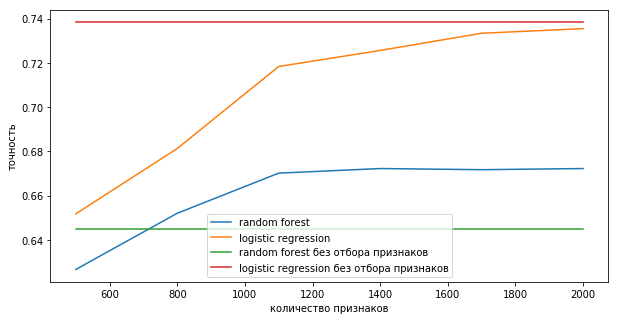

In [44]:
%%time
accurasy_list = get_accuracy_list(feature_imporances["p-value"])
print_results(accurasy_list)

In [45]:
# RNN

In [28]:
docs = [doc.split() for doc in df['transformed_text']]

In [29]:
docs

[['после',
  'оплата',
  'выполнение',
  'знз',
  'не',
  'получаться',
  'исполнить',
  'знс',
  '№10004533443'],
 ['вопрос', 'проблема', 'не', 'давать', 'исполнить', 'знс'],
 ['вопрос',
  'проблема',
  'не',
  'мочь',
  'исполнить',
  'знз',
  'по',
  'договор',
  'система',
  'выдавать',
  'ошибка',
  'что',
  'ожидаться',
  'проводка'],
 ['вопрос',
  'проблема',
  'дорбрый',
  'день',
  'пытаться',
  'провести',
  'тестовый',
  'платёж',
  'с',
  'поставщик',
  'в',
  'рамка',
  'электронный',
  'документаоборот',
  'для',
  'это',
  'в',
  'рамочный',
  'договор',
  'создать',
  'нижестоящий',
  'запросить',
  'у',
  'профильник',
  'знс',
  'и',
  'знз',
  'создать',
  'спецификация',
  'далее',
  'согласно',
  'инструкция',
  'нажимать',
  'на',
  'иконка',
  'созд',
  'эда',
  'заявкнапостав',
  'он',
  'вылетать',
  'окно',
  'что',
  'уже',
  'эда',
  'существовать',
  'хотя',
  'я',
  'ничто',
  'не',
  'делать',
  'теперь',
  'найти',
  'это',
  'окно',
  'не',
  'мочь',
  

In [30]:
#Обучаем Word2Vec на нашем корпусе слов
from gensim.models import Word2Vec

EMBEDDING_DIM = 100
w2v = Word2Vec(sentences=docs, size=EMBEDDING_DIM, window=4, sg=0, iter=35, min_count=1)

In [31]:
w2v

In [32]:
# для разных слов посмотрим ближайшие к ним слова в смысле близости между Word2Vec векторами
w2v.most_similar('ошибка')

[('сообщение', 0.6926524639129639),
 ('ошик', 0.6399029493331909),
 ('надпись', 0.527725875377655),
 ('предупреждение', 0.5249192118644714),
 ('расхождение', 0.4845898449420929),
 ('сантиметр', 0.4796143174171448),
 ('сообщенийя', 0.456557035446167),
 ('окiмый', 0.4451168179512024),
 ('окошко', 0.43714454770088196),
 ('табличка', 0.42685213685035706)]

In [33]:
w2v.most_similar('сумма')

[('копейка', 0.6760665774345398),
 ('размер', 0.5688033699989319),
 ('стоимость', 0.5079491138458252),
 ('мила', 0.49833714962005615),
 ('ндс', 0.49530547857284546),
 ('миллион', 0.49300384521484375),
 ('тысяча', 0.49212825298309326),
 ('рубль', 0.48341038823127747),
 ('объём', 0.481649249792099),
 ('сентябова', 0.4607108533382416)]

In [34]:
w2v.most_similar('отчёт')

[('очета', 0.48027852177619934),
 ('ведомость', 0.40815192461013794),
 ('документ', 0.39973771572113037),
 ('заявка', 0.3866788446903229),
 ('отчента', 0.3862687647342682),
 ('знк', 0.3767559826374054),
 ('акт', 0.3761574625968933),
 ('фп', 0.3761020302772522),
 ('саба', 0.37367039918899536),
 ('фактический', 0.3658541440963745)]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(df, df["class"], stratify=df["class"], test_size=0.2)

In [36]:
X_train.head()

,text,class,transformed_text
11059,Необходимо изменить период командировки в заяв...,5-7,необходимый изменить период командировка в зая...
1623,Вопрос/проблема: Добрый день! При попытке испо...,1-22,вопрос проблема добрый день при попытка исполн...
956,Доброе утро!!! При попытке отправить ЗНИ 60000...,1-4,добрый утро при попытка отправить зни на согла...
14595,Вопрос/проблема: Не могу войти в АС УВХД. Испо...,2-23,вопрос проблема не мочь войти в ас увхд исполн...
13135,"Вопрос/Проблема: коллеги добрый день, прошу пе...",6-2,вопрос проблема коллега добрый день просить пе...


In [37]:
y_train.head()

11059     5-7
1623     1-22
956       1-4
14595    2-23
13135     6-2
Name: class, dtype: object

In [38]:
# 1) Далее каждое слово заменяем его номером в словаре
# 2) Фиксируем колличество слов в обращении

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
MAX_SEQUENCE_LENGTH = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train["transformed_text"])

sequences_train = tokenizer.texts_to_sequences(X_train["transformed_text"])
data_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)

sequences_dev = tokenizer.texts_to_sequences(X_dev["transformed_text"])
data_dev = pad_sequences(sequences_dev, maxlen=MAX_SEQUENCE_LENGTH)
data_train.shape, data_dev.shape

Using TensorFlow backend.


((15449, 100), (3863, 100))

In [39]:
sequences_train

[[18,
  117,
  377,
  29,
  1,
  28,
  1,
  120,
  55,
  219,
  24,
  28,
  2,
  34,
  92,
  28,
  207,
  321,
  117,
  3,
  1117,
  321,
  3,
  430,
  1281,
  3777,
  28,
  207,
  321,
  439,
  28,
  8,
  207,
  321,
  24,
  112,
  28,
  275,
  28,
  9,
  571,
  377,
  112,
  28,
  3,
  403,
  16,
  1,
  88],
 [4,
  5,
  11,
  10,
  13,
  215,
  131,
  130,
  207,
  279,
  1525,
  6229,
  1332,
  586,
  28,
  2,
  343,
  230,
  16,
  88,
  1,
  42,
  130,
  1,
  55,
  175,
  3,
  1282,
  144,
  48,
  131,
  19,
  3,
  163,
  54,
  70,
  1,
  95,
  9,
  210,
  230,
  193,
  16,
  8,
  20,
  109,
  1987,
  1434,
  130],
 [11,
  540,
  13,
  215,
  139,
  38,
  2,
  34,
  66,
  76,
  16,
  57,
  1,
  681,
  724,
  2,
  71,
  3,
  293,
  9,
  57,
  7,
  189,
  2,
  49,
  64,
  70,
  96,
  534,
  74,
  18,
  458,
  190,
  47],
 [4, 5, 3, 22, 779, 1, 84, 31, 69, 98, 42],
 [4, 5, 174, 11, 10, 15, 274, 17, 20, 25, 75, 167, 1, 167],
 [11,
  10,
  9,
  7,
  21,
  587,
  754,
  923,
  4526,
  23

In [40]:
data_train

array([[    0,     0,     0, ...,    16,     1,    88],
       [    0,     0,     0, ...,  1987,  1434,   130],
       [    0,     0,     0, ...,   458,   190,    47],
       ...,
       [    0,     0,     0, ...,   309,     3, 15275],
       [    0,     0,     0, ...,     5,     3,   230],
       [    0,     0,     0, ...,    28,     2,   309]])

In [41]:
# Подготовим матрицу, которая будет отвечать за преобразование, которое отвечает за замещение номеров слов в словаре на их
# векторные представления

embedding_matrix = np.random.random((len(tokenizer.word_index) + 1, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    if word in w2v.wv.vocab.keys():
        embedding_vector = w2v.wv.word_vec(word)
    else:
        embedding_vector = np.zeros(EMBEDDING_DIM)
    embedding_matrix[i] = embedding_vector

In [42]:
embedding_matrix

array([[ 0.35047583,  0.55759477,  0.69590549, ...,  0.04827988,
         0.26045738,  0.59074172],
       [ 0.25183085, -0.94339931,  2.09873891, ..., -1.39807951,
         1.46561229,  0.56814474],
       [ 1.54966426,  0.19344328,  1.56621134, ..., -0.98121089,
        -1.11305737,  0.00549212],
       ...,
       [ 0.05912321,  0.09454063,  0.1696973 , ...,  0.1096492 ,
        -0.04458144, -0.15964507],
       [ 0.08314659,  0.01156222,  0.1075968 , ...,  0.10643958,
         0.10349996, -0.02204399],
       [-0.14858527, -0.00538611,  0.08159205, ...,  0.03241107,
        -0.05784628,  0.05209266]])

In [43]:
embedding_vector

array([-1.48585275e-01, -5.38610620e-03,  8.15920457e-02, -1.26483766e-02,
        3.22856270e-02, -3.15506682e-02, -9.22476426e-02, -7.42076561e-02,
        2.98424065e-02, -5.05698621e-02, -1.90164708e-02,  2.16952682e-01,
       -6.65600896e-02,  7.35751614e-02, -8.38315953e-03,  5.45502640e-02,
       -6.28034323e-02, -8.24639574e-02, -1.79368854e-02, -7.50326961e-02,
        3.15352567e-02, -9.02514830e-02, -1.51970959e-03,  5.82528152e-02,
        6.45885943e-03,  7.47004524e-02,  6.40173256e-03,  8.97645671e-03,
       -2.72363126e-02,  4.68046516e-02, -5.23837004e-03,  7.05129355e-02,
        1.06749050e-01, -1.37329334e-02,  2.62368862e-02, -4.50840741e-02,
        2.00674627e-02,  2.42641978e-02,  4.51914147e-02,  6.70874566e-02,
       -1.95462573e-02,  1.04639344e-01, -5.03392145e-02, -8.87750164e-02,
       -5.71336001e-02, -8.91496334e-03,  1.08915463e-01,  5.14814705e-02,
       -4.15024683e-02, -3.93083245e-02,  6.82602450e-02, -1.71417110e-02,
       -4.78607528e-02,  

In [44]:
N_CLASSES = len(set(y_train))

In [45]:
N_CLASSES

77

In [49]:
from tensorflow.compat.v1.keras.models import Model
import tensorflow.compat.v1.keras.layers as L

layer_input = L.Input((MAX_SEQUENCE_LENGTH,))
layer_emb = L.Embedding(len(tokenizer.word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)(layer_input)
#glob_maxpool = L.GlobalMaxPool1D(layer_emb)
#layer_spdrop = L.SpatialDropout1D(0.2)(layer_emb)
layer_bilstm = L.Bidirectional(L.LSTM(128, return_sequences=True))(layer_emb)
layer_bilstm1 = L.Bidirectional(L.LSTM(128, recurrent_dropout=0.2))(layer_bilstm)
layer_flat = L.Flatten()(layer_bilstm1)
layer_output = L.Dense(80, activation='relu')(layer_flat)
layer_output1 = L.Dense(N_CLASSES, activation='softmax')(layer_output)

lstm = Model(layer_input, layer_output1)

#layer_lstm = L.LSTM(128, return_sequences=True, recurrent_dropout=0.2)(layer_spdrop)
#layer_lstm1 = L.LSTM(128, return_sequences=True)(layer_lstm)
#layer_lstm = L.Bidirectional(L.LSTM(128, return_sequences=True))(layer_emb)
#xFirst = L.Lambda(lambda q: q[:, -1])(layer_lstm1)  # [b_s, vec_dim]
#query = L.Dense(128)(xFirst)
#attScores = L.Dot(axes=[1, 2])([query, layer_lstm1])
#attScores = L.Softmax(name='attSoftmax')(attScores)
#attVector = L.Dot(axes=[1, 1])([attScores, layer_lstm1])  # [b_s, vec_dim]

#layer_flat = L.Flatten()(attVector)
#layer_output = L.Dense(80, activation='relu')(layer_flat)
#layer_output1 = L.Dense(N_CLASSES, activation='softmax')(layer_output)

#lstm = Model(layer_input, layer_output1)

In [52]:
from tensorflow.compat.v1.keras.layers import (BatchNormalization, Conv1D, Conv2D, Dense, Input, 
    TimeDistributed, Activation, Bidirectional, SimpleRNN, GRU, LSTM, Lambda)

In [53]:
input_data = Input(name='the_input', shape=(None, 13))

In [57]:
conv_1d = Conv1D(200, 11, strides=2, padding='valid', activation='tanh',
                 name='conv1d', dilation_rate=1)(input_data)
bn_cnn = BatchNormalization(name='bn_conv_1d')(conv_1d)
conv_1d1 = Conv1D(100, 11, strides=2, padding='valid', activation='tanh',
                 name='conv1d1', dilation_rate=1)(bn_cnn)
bn_cnn = BatchNormalization(name='bn_conv_1d1')(conv_1d1)

simp_rnn = LSTM(250, activation='tanh', return_sequences=True, implementation=2, name='rnn_1', dropout=0.2)(bn_cnn)
#bn_rnn = BatchNormalization(name='bn_rnn_1')(simp_rnn)
simp_rnn_fin = LSTM(250, activation='tanh', return_sequences=True, implementation=2, name='final_layer_of_rnn', dropout=0.2)(simp_rnn)
bn_rnn_fin = BatchNormalization(name='bt_rnn_final')(simp_rnn_fin)
time_dense = TimeDistributed(Dense(128))(bn_rnn_fin)
time_dense1 = TimeDistributed(Dense(56))(time_dense)
y_pred = Activation('softmax', name='softmax')(time_dense1)

In [58]:
model = Model(inputs=input_data, outputs=y_pred)
model.output_length = lambda x: cnn_output_length(x, 11, 'valid', 2)

In [59]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 200)         28800     
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
conv1d1 (Conv1D)             (None, None, 100)         220100    
_________________________________________________________________
bn_conv_1d1 (BatchNormalizat (None, None, 100)         400       
_________________________________________________________________
rnn_1 (LSTM)                 (None, None, 250)         351000    
_________________________________________________________________
final_layer_of_rnn (LSTM)    (None, None, 250)         5010

In [51]:
lstm.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 100)          1527600   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 256)          234496    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               394240    
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                20560     
_________________________________________________________________
dense_3 (Dense)              (None, 77)                6237

In [91]:
lstm.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']    
)

In [92]:
# ОСТОРОЖНО! Одна итерация может занять 5 - 10 минут

In [98]:
lstm.fit(
    data_train, pd.get_dummies(y_train).values,
    validation_data = (data_dev, pd.get_dummies(y_dev).values),
    epochs = 10,
    batch_size = 64,
    shuffle = True,
    verbose=1
)

Train on 15449 samples, validate on 3863 samples
Epoch 1/10
15449/15449 [==============================] - 154s 10ms/sample - loss: 0.2591 - accuracy: 0.9175 - val_loss: 1.0113 - val_accuracy: 0.7694
Epoch 2/10
15449/15449 [==============================] - 153s 10ms/sample - loss: 0.2550 - accuracy: 0.9173 - val_loss: 1.0644 - val_accuracy: 0.7701
Epoch 3/10
15449/15449 [==============================] - 159s 10ms/sample - loss: 0.2488 - accuracy: 0.9196 - val_loss: 1.0858 - val_accuracy: 0.7686
Epoch 4/10
15449/15449 [==============================] - 156s 10ms/sample - loss: 0.2392 - accuracy: 0.9232 - val_loss: 1.1035 - val_accuracy: 0.7644
Epoch 5/10
15449/15449 [==============================] - 152s 10ms/sample - loss: 0.2313 - accuracy: 0.9267 - val_loss: 1.0803 - val_accuracy: 0.7706
Epoch 6/10
15449/15449 [==============================] - 152s 10ms/sample - loss: 0.2152 - accuracy: 0.9285 - val_loss: 1.0831 - val_accuracy: 0.7727
Epoch 7/10
15449/15449 [=====================

In [99]:
score = lstm.evaluate(data_dev, pd.get_dummies(y_dev).values)

3863/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [79]:
score

[0.8537065784239318, 0.7595133]

In [120]:
labels1 = ['1-1', '1-22', '1-71', '1-72', '1-45', '1-43', '1-70', '1-67',
       '1-46', '1-16', '1-74', '1-38', '1-6', '1-23', '1-14', '1-51',
       '1-64', '1-75', '1-37', '1-44', '1-29', '1-4', '6-1', '2-12',
       '2-16', '6-2', '2-1', '2-18', '2-44', '2-19', '2-14', '2-30',
       '2-10', '2-28', '2-6', '2-26', '2-2', '2-25', '2-29', '2-22',
       '2-23', '2-43', '2-31', '6-5', '111', '4-17', '999', '0', '3-1',
       '3-2', '3-5', '3-8', '3-9', '3-11', '3-15', '6-4', '3-13', '3-21',
       '3-25', '3-27', '4-5', '4-7', '4-11', '4-23', '5-26', '5-2', '5-8',
       '5-12', '5-29', '5-4', '5-7', '5-30', '5-1', '5-19', '5-17',
       '5-21', '5-27']

In [121]:
type(labels1)

list

In [80]:
labels = df['class'].unique()
labels

array(['1-1', '1-22', '1-71', '1-72', '1-45', '1-43', '1-70', '1-67',
       '1-46', '1-16', '1-74', '1-38', '1-6', '1-23', '1-14', '1-51',
       '1-64', '1-75', '1-37', '1-44', '1-29', '1-4', '6-1', '2-12',
       '2-16', '6-2', '2-1', '2-18', '2-44', '2-19', '2-14', '2-30',
       '2-10', '2-28', '2-6', '2-26', '2-2', '2-25', '2-29', '2-22',
       '2-23', '2-43', '2-31', '6-5', '111', '4-17', '999', '0', '3-1',
       '3-2', '3-5', '3-8', '3-9', '3-11', '3-15', '6-4', '3-13', '3-21',
       '3-25', '3-27', '4-5', '4-7', '4-11', '4-23', '5-26', '5-2', '5-8',
       '5-12', '5-29', '5-4', '5-7', '5-30', '5-1', '5-19', '5-17',
       '5-21', '5-27'], dtype=object)

In [117]:
type(labels)

numpy.ndarray

In [81]:
new_ticket = ['Не работает компьютер пожалуйста помогите']

In [82]:
seq = tokenizer.texts_to_sequences(new_ticket)
seq

[[3, 808, 72]]

In [83]:
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
padded

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3, 808,  72]])

In [84]:
pred = lstm.predict(padded)
pred

array([[7.7602363e-01, 7.2310591e-04, 3.2300659e-04, 1.2360004e-04,
        1.3834880e-04, 8.7075779e-04, 2.0356574e-03, 1.2948702e-04,
        4.9274680e-05, 1.8781418e-05, 1.6625020e-04, 3.7601043e-03,
        1.1492829e-04, 3.8252573e-03, 2.6784663e-03, 1.7829045e-05,
        3.0799364e-04, 1.2479727e-04, 7.7353502e-03, 7.5381773e-04,
        1.3569476e-04, 6.9233472e-04, 1.3999090e-03, 1.5667554e-02,
        8.0275564e-03, 2.2417434e-04, 2.3963397e-04, 3.1771983e-03,
        3.3710517e-03, 1.3849905e-02, 9.5609640e-04, 6.9031768e-02,
        4.5782579e-03, 4.3176658e-02, 8.7265280e-04, 7.8425434e-04,
        4.8794009e-05, 1.0352359e-03, 1.6635680e-03, 3.8060294e-05,
        5.1675260e-04, 2.2430607e-04, 3.0055959e-04, 3.6632502e-04,
        4.3800278e-04, 1.8642504e-04, 1.3671353e-04, 9.7708195e-05,
        2.4224038e-05, 3.1676164e-04, 8.0879123e-05, 2.1034070e-05,
        2.0223368e-05, 3.2387412e-05, 4.7719394e-04, 2.2709367e-04,
        4.5917707e-04, 7.1742182e-04, 1.3346444e

In [85]:
print(pred, labels[np.argmax(pred)])

[[7.7602363e-01 7.2310591e-04 3.2300659e-04 1.2360004e-04 1.3834880e-04
  8.7075779e-04 2.0356574e-03 1.2948702e-04 4.9274680e-05 1.8781418e-05
  1.6625020e-04 3.7601043e-03 1.1492829e-04 3.8252573e-03 2.6784663e-03
  1.7829045e-05 3.0799364e-04 1.2479727e-04 7.7353502e-03 7.5381773e-04
  1.3569476e-04 6.9233472e-04 1.3999090e-03 1.5667554e-02 8.0275564e-03
  2.2417434e-04 2.3963397e-04 3.1771983e-03 3.3710517e-03 1.3849905e-02
  9.5609640e-04 6.9031768e-02 4.5782579e-03 4.3176658e-02 8.7265280e-04
  7.8425434e-04 4.8794009e-05 1.0352359e-03 1.6635680e-03 3.8060294e-05
  5.1675260e-04 2.2430607e-04 3.0055959e-04 3.6632502e-04 4.3800278e-04
  1.8642504e-04 1.3671353e-04 9.7708195e-05 2.4224038e-05 3.1676164e-04
  8.0879123e-05 2.1034070e-05 2.0223368e-05 3.2387412e-05 4.7719394e-04
  2.2709367e-04 4.5917707e-04 7.1742182e-04 1.3346444e-03 3.6812652e-04
  6.3584093e-03 1.8217372e-04 1.0270656e-03 5.8414071e-04 2.2598513e-04
  4.3905168e-03 5.2787369e-04 6.6392985e-04 1.1525747e-04 6.0693

In [98]:
from tensorflow.compat.v1.keras.models import load_model

In [86]:
#Сохраняем модель

In [88]:
# Сохраняем целую модель в HDF5 файле
lstm.save('nlp.h5')

In [99]:
# Пересоздаем ту же самую модель, включая веса и оптимизатор.
lstm = load_model('nlp.h5')

In [101]:
lstm.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 100)          1536700   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 77)                9933      
Total params: 1,663,881
Trainable params: 127,181
Non-trainable params: 1,536,700
_____________________________________________

In [122]:
new_ticket = ['Не могу создать заявку на этикетки']

In [123]:
seq = tokenizer.texts_to_sequences(new_ticket)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = lstm.predict(padded)

In [124]:
print(pred, labels1[np.argmax(pred)])

[[1.78955331e-01 1.41681533e-03 2.03158753e-03 5.20201446e-03
  1.74692570e-04 1.44240810e-02 8.40976555e-03 2.44022289e-04
  4.60262410e-04 1.29796099e-04 2.81865476e-03 2.34100949e-02
  6.86886674e-03 5.15018357e-04 1.16058416e-03 6.08139671e-05
  1.19143911e-03 1.04763522e-03 2.00405553e-01 4.72421088e-04
  1.26083824e-03 7.53622211e-04 3.30941111e-04 2.65785865e-02
  1.24320528e-03 5.20403672e-04 5.12105739e-03 4.71897982e-02
  2.69995886e-04 5.08765131e-03 4.05838853e-03 6.26073629e-02
  2.34582648e-03 4.40483168e-02 1.64706341e-03 8.31298996e-03
  2.96701910e-04 6.21839538e-02 1.55814912e-03 6.78076001e-04
  2.18598358e-03 7.65017874e-04 7.98600167e-03 6.82766922e-03
  6.94159477e-04 8.15295556e-04 3.81251215e-04 6.15145592e-03
  1.73457712e-03 5.28220087e-04 4.51184751e-05 9.13286713e-05
  2.91384174e-03 2.78394524e-04 8.54919478e-03 5.69963304e-04
  3.97904031e-02 4.84920945e-03 3.18101537e-03 1.21494131e-02
  6.40524493e-04 2.37270328e-03 3.07172444e-03 2.17794273e-02
  5.7526

In [125]:
len(labels1)

77

In [126]:
print(labels1[np.argmax(pred)])

1-37


In [127]:
import pickle

In [128]:
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [129]:
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)